In [1]:
!pip install squarify

In [2]:
# Descargo la paqueteria necesaria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as shc
import squarify

In [3]:
# Descarga y limpieza de datos rapida

ventas_inegi = pd.read_excel('Ventas Entrenamiento INEGI.xlsx')
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

# Se estandariza nombre de columna Modelo
ventas_inegi = ventas_inegi.rename(columns={'Modelo': 'Modelos'})

# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Km'] < 200000)]

# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

# Se convierte Año en ambos sets de datos de Entero a objeto
ventas_inegi['ANIO']= ventas_inegi['ANIO'].astype(str)
ventas_scraping['Año']= ventas_scraping['Año'].astype(str)

print(len(ventas_inegi))
print(len(ventas_scraping))

32969
7448


In [ ]:
ventas_inegi = pd.read_excel('Ventas Entrenamiento INEGI.xlsx')
ventas_scraping = pd.read_excel('Webscraping Data Entrenamiento.xlsx')

### Leo la data

In [4]:
ventas_inegi.head()

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Acura,ILX,Automóviles,De Lujo,IMPORTADO,66,39
1,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,55
2,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,77
3,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Acura,TLX,Automóviles,De Lujo,IMPORTADO,66,34
4,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Alfa Romeo,Alfa Romeo Giulietta Progression Manual,Automóviles,Deportivos,IMPORTADO,124,9


In [5]:
ventas_inegi.dtypes

PROD_EST          object
COBERTURA         object
ANIO              object
ID_MES             int64
MARCA             object
MODELO            object
TIPO              object
SEGMENTO          object
ORIGEN            object
ID_PAIS_ORIGEN     int64
UNI_VEH            int64
dtype: object

In [6]:
ventas_scraping.dtypes

Marcas             object
Modelos            object
Año                object
Año_Modelo_Diff     int64
Km                  int64
Ciudad de Venta    object
Precio MXN          int64
hash               object
dtype: object

In [7]:
ventas_scraping.head()

,Marcas,Modelos,Año,Año_Modelo_Diff,Km,Ciudad de Venta,Precio MXN,hash
0,Chevrolet,Aveo,2020,2,19440,Tlalpan,212700,Chevrolet_Aveo_2020_19440_Tlalpan_212700
1,Chevrolet,Aveo,2018,4,50000,San Pedro Garza Garcia,165000,Chevrolet_Aveo_2018_50000_San Pedro Garza Garc...
2,Chevrolet,Aveo,2018,4,30000,Tlalnepantla,197600,Chevrolet_Aveo_2018_30000_Tlalnepantla_197600
3,Chevrolet,Aveo,2019,3,15697,Tlalnepantla,200800,Chevrolet_Aveo_2019_15697_Tlalnepantla_200800
4,Chevrolet,Aveo,2018,4,44769,Texcoco,180000,Chevrolet_Aveo_2018_44769_Texcoco_180000


In [8]:
# Cambio los nombres de las variables necesarias

ventas_inegi = ventas_inegi.rename(columns={'Modelo': 'Modelos'})
ventas_inegi = ventas_inegi.rename(columns={'ANIO': 'Año que se realizo la Venta'})
ventas_inegi = ventas_inegi.rename(columns={'ID_MES': 'Mes que se realizo la Venta'})
ventas_inegi = ventas_inegi.rename(columns={'UNI_VEH': 'Cantidad de Unidades Vendidas'})
ventas_inegi = ventas_inegi.rename(columns={'ID_PAIS_ORIGEN': 'ID Pais de Origen'})

ventas_scraping= ventas_scraping.rename(columns={'Año': 'Año del Modelo'}) 
ventas_scraping= ventas_scraping.rename(columns={'Km': 'Kilometraje de los vehiculos de segunda mano'}) 
ventas_scraping= ventas_scraping.rename(columns={'Año_Modelo_Diff': 'Diferencia entre año de Modelo y Año actual (2022)'}) 

In [9]:
ventas_scraping.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diferencia entre año de Modelo y Año actual (2022),7448.0,3.738453,1.383811,0.0,3.00,4.0,5.0,6.0
Kilometraje de los vehiculos de segunda mano,7448.0,54500.638963,28528.997231,0.0,33227.75,52500.0,72636.0,198000.0
Precio MXN,7448.0,371134.310419,152817.760117,98000.0,257787.50,339000.0,450000.0,899990.0


In [10]:
ventas_inegi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mes que se realizo la Venta,32969.0,6.372774,3.453888,1.0,3.0,6.0,9.0,12.0
ID Pais de Origen,32969.0,66.378810,75.197925,1.0,4.0,66.0,95.0,999.0
Cantidad de Unidades Vendidas,32969.0,259.665929,703.274949,-791.0,4.0,41.0,206.0,13161.0


### Analisis Univariado

Text(0, 0.5, 'Ventas Totales')

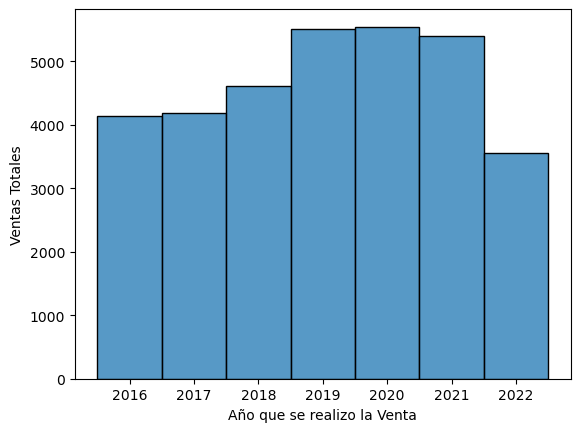

In [11]:
sn.histplot(data= ventas_inegi['Año que se realizo la Venta'])
plt.xlabel('Año que se realizo la Venta')
plt.ylabel('Ventas Totales')

Text(0, 0.5, 'Ventas Totales')

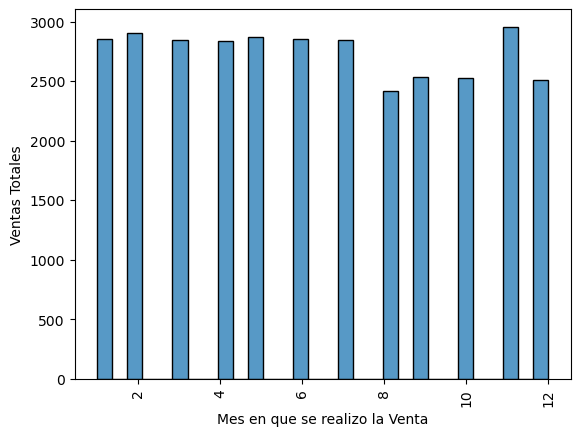

In [12]:
sn.histplot(data= ventas_inegi['Mes que se realizo la Venta'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Mes en que se realizo la Venta')
plt.ylabel('Ventas Totales')

[None, None, None, None]

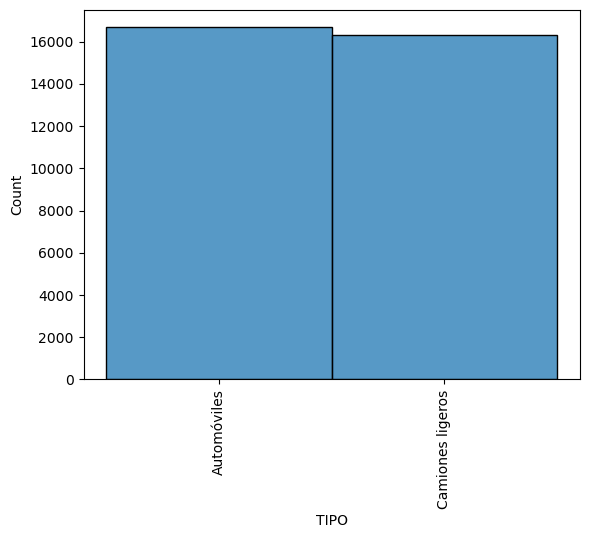

In [13]:
sn.histplot(data= ventas_inegi['TIPO'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

Text(0, 0.5, 'Ventas Totales')

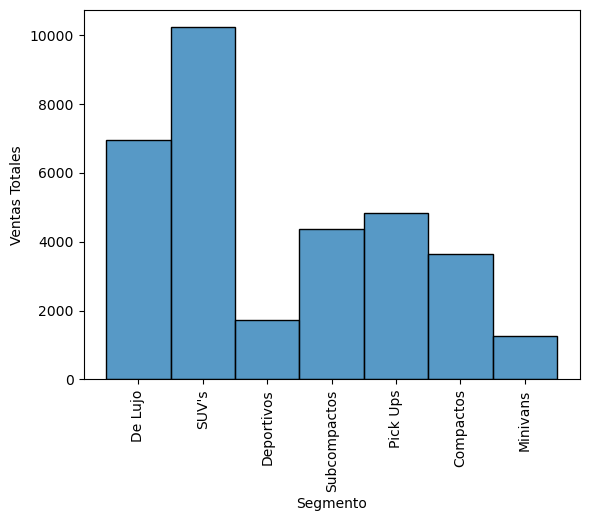

In [14]:
sn.histplot(data= ventas_inegi['SEGMENTO'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Segmento')
plt.ylabel('Ventas Totales')

Text(0, 0.5, 'Ventas Totales')

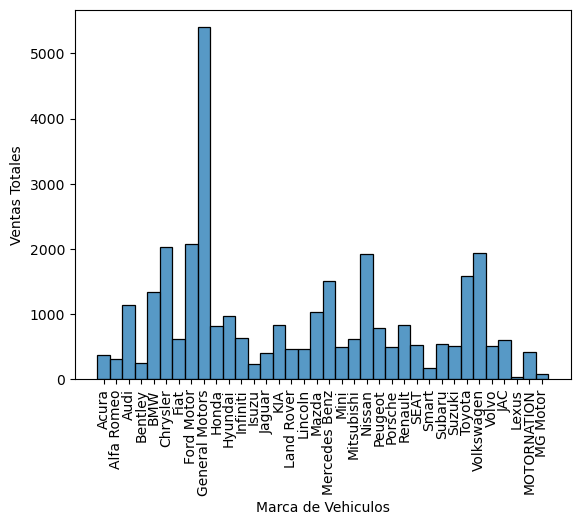

In [15]:
sn.histplot(data= ventas_inegi['MARCA'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Marca de Vehiculos')
plt.ylabel('Ventas Totales')

[Text(0.5, 0, 'Las 6 marcas mas populares'),
 Text(0, 0.5, 'Cantidad de Unidades Vendidas')]

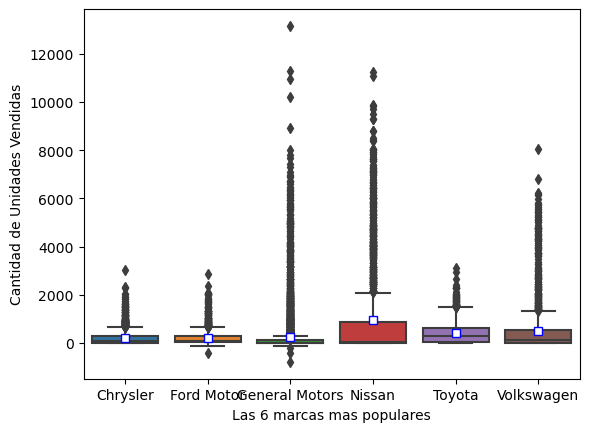

In [16]:
# Primero selecciono 
df_modelos = ventas_inegi[ventas_inegi['MARCA'].isin(['General Motors', 'Ford Motor', 'Chrysler', 'Nissan', 'Toyota', 'Volkswagen'])]

# Hago el boxplot con 2 variables
sn.boxplot(x = df_modelos['MARCA'],
            y = df_modelos['Cantidad de Unidades Vendidas'], showmeans=True,
          meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
            xlabel = 'Las 6 marcas mas populares',
            ylabel = 'Cantidad de Unidades Vendidas')

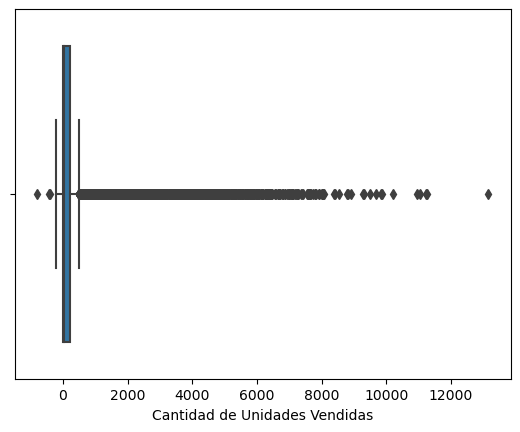

In [17]:
# Hago los boxplot
# Defino el objeto con la variable
data = ventas_inegi['Cantidad de Unidades Vendidas']
sn.boxplot(x=data)
plt.show()

Text(0, 0.5, 'Conteo total de publicaciónes')

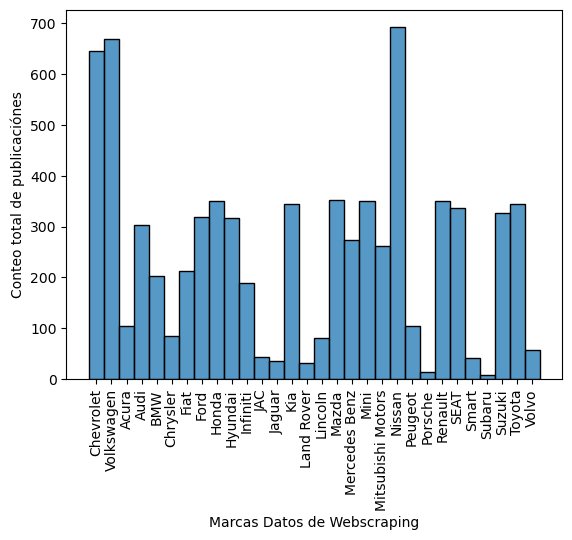

In [18]:
sn.histplot(data= ventas_scraping['Marcas'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Marcas Datos de Webscraping')
plt.ylabel('Conteo total de publicaciónes')

Text(0, 0.5, 'Conteo total de publicaciónes')

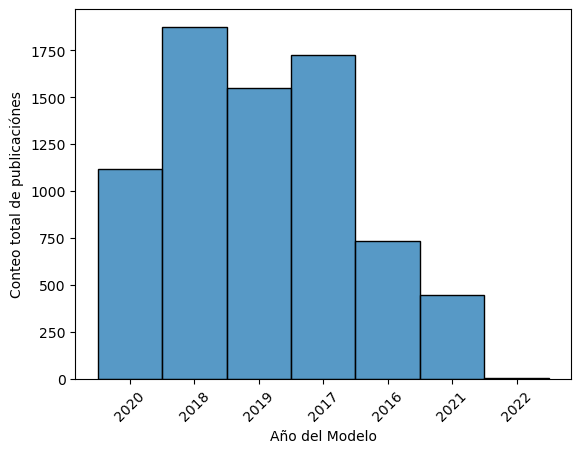

In [31]:
sn.histplot(data= ventas_scraping['Año del Modelo'])
locs, labels = plt.xticks()
plt.xticks(rotation=45)
plt.xlabel('Año del Modelo')
plt.ylabel('Conteo total de publicaciónes')

Text(0, 0.5, 'Ventas Totales')

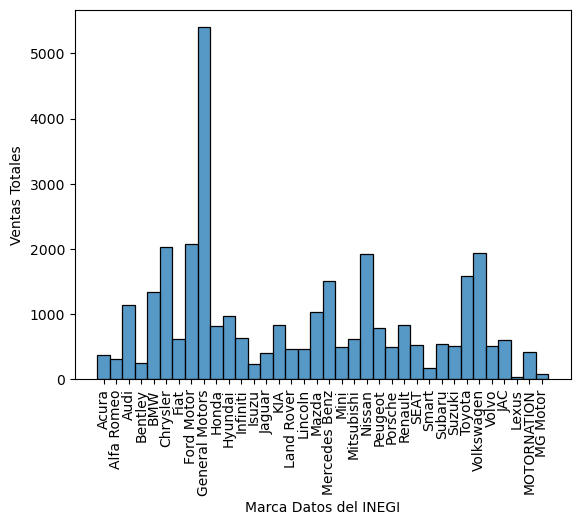

In [33]:
sn.histplot(data= ventas_inegi['MARCA'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Marca Datos del INEGI')
plt.ylabel('Ventas Totales')

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

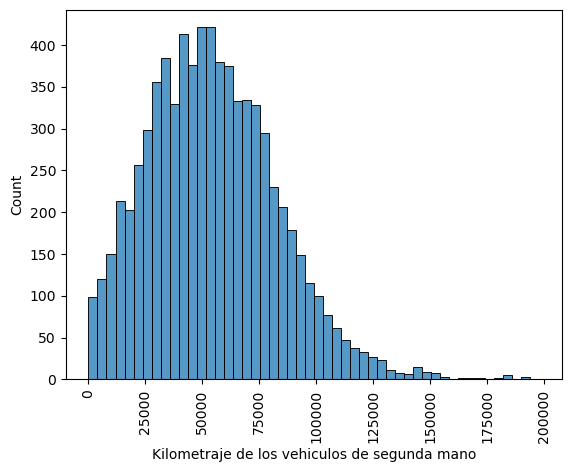

In [19]:
sn.histplot(data= ventas_scraping['Kilometraje de los vehiculos de segunda mano'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)

Text(0, 0.5, 'Conteo total de publicaciónes')

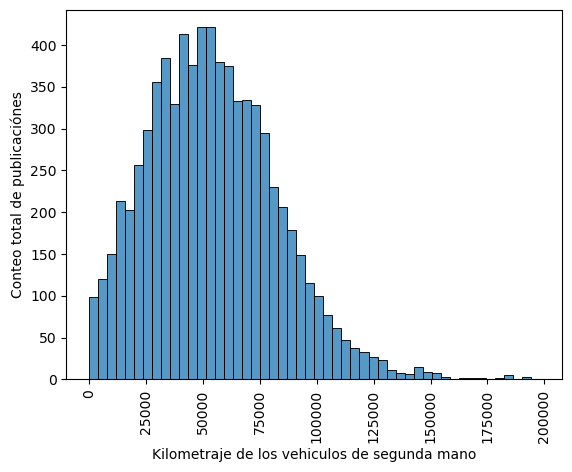

In [20]:
# Se elimina outlier de Km
ventas_scraping = ventas_scraping[(ventas_scraping['Kilometraje de los vehiculos de segunda mano'] < 200000)]

sn.histplot(data= ventas_scraping['Kilometraje de los vehiculos de segunda mano'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Kilometraje de los vehiculos de segunda mano')
plt.ylabel('Conteo total de publicaciónes')

In [21]:
# Se elimina outliers de Precio
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] > 50000)]
ventas_scraping = ventas_scraping[(ventas_scraping['Precio MXN'] < 900000)]

Text(0, 0.5, 'Conteo total de publicaciónes')

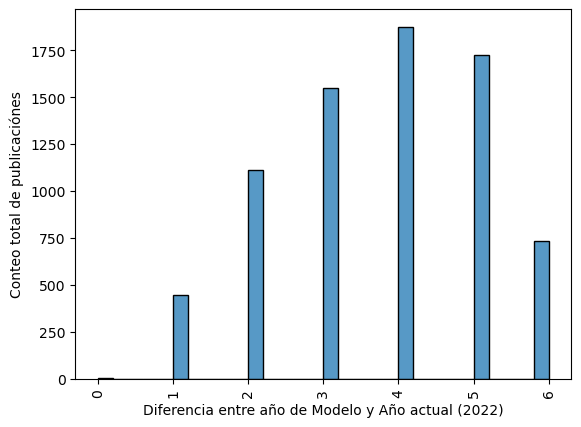

In [22]:
sn.histplot(data= ventas_scraping['Diferencia entre año de Modelo y Año actual (2022)'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.ylabel('Conteo total de publicaciónes')

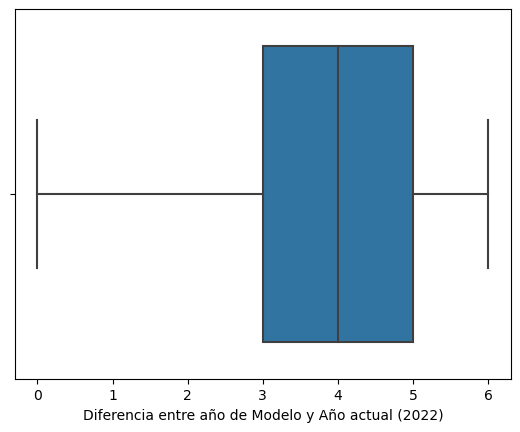

In [23]:
# Hago los boxplot
# Defino el objeto con la variable
data = ventas_scraping['Diferencia entre año de Modelo y Año actual (2022)']
sn.boxplot(x=data)
plt.show()

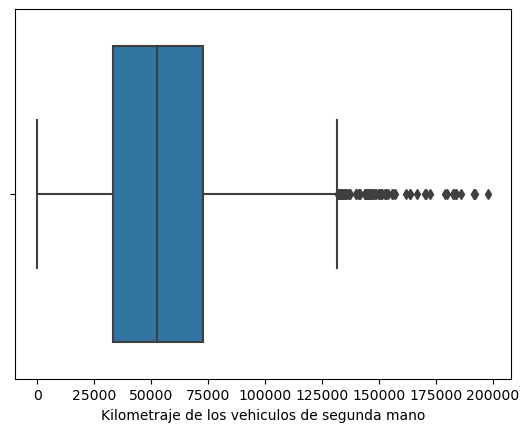

In [24]:
# Hago los boxplot
# Defino el objeto con la variable
data = ventas_scraping['Kilometraje de los vehiculos de segunda mano']
sn.boxplot(x=data)
plt.show()

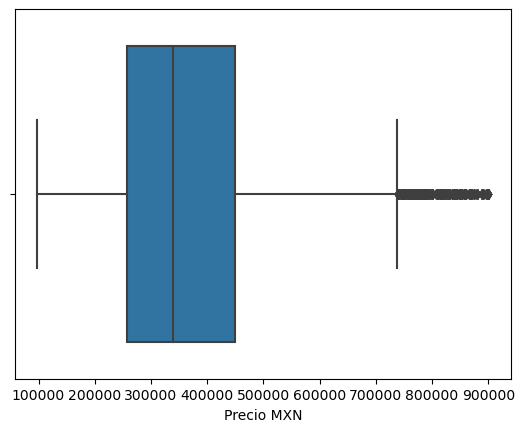

In [25]:
# Hago los boxplot
# Defino el objeto con la variable
data = ventas_scraping['Precio MXN']
sn.boxplot(x=data)
plt.show()

In [43]:
# Hago los boxplot
# Defino el objeto con la variable
data = ventas_scraping['Año del Modelo']
sn.boxplot(x=data)
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<AxesSubplot:>

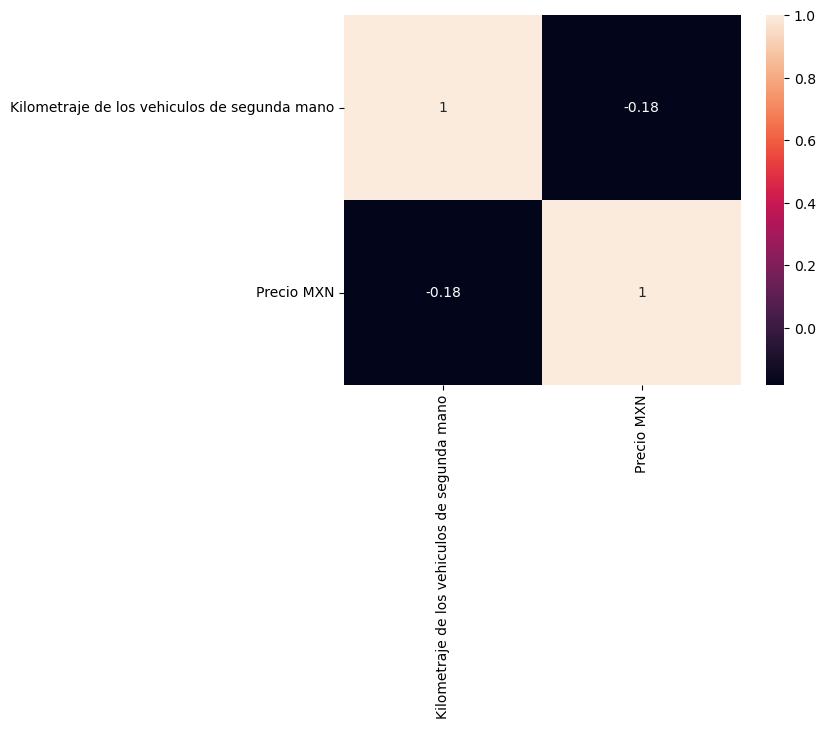

In [28]:
# Analisis de Correlación
X = ventas_scraping[['Kilometraje de los vehiculos de segunda mano', 'Año del Modelo', 'Precio MXN']]
corr = X.corr()

sn.heatmap(corr, annot= True)

In [29]:
sn.histplot(data= ventas_inegi, x= 'Marca', y= 'Año que se realizo la Venta')
plt.xticks(rotation=90)
plt.xlabel('Marcas Datos del INEGI')
plt.ylabel('Año que se realizo la Venta')

ValueError: Could not interpret value `Marca` for parameter `x`

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

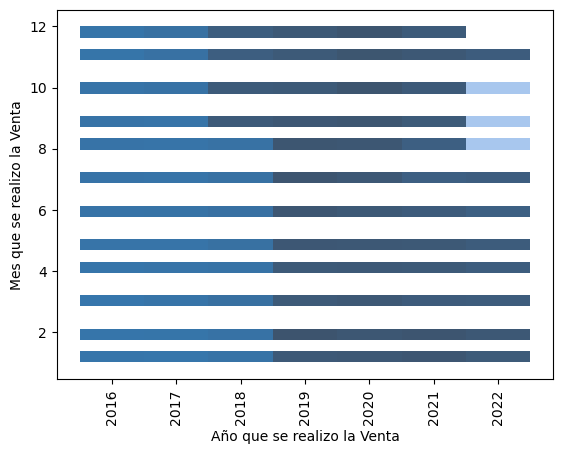

In [44]:
sn.histplot(data= ventas_inegi, x= 'Año que se realizo la Venta', y= 'Mes que se realizo la Venta')
plt.xticks(rotation=90)

In [31]:
sn.histplot(data= ventas_inegi, x= 'Año que se realizo la Venta', y= 'Segmento')
plt.xticks(rotation=90)

ValueError: Could not interpret value `Segmento` for parameter `y`

In [32]:
sn.histplot(data= ventas_inegi, x= 'Marca', y= 'Segmento')
plt.xticks(rotation=90)
plt.xlabel('Marcas Datos del INEGI')
plt.ylabel('Segmento')

ValueError: Could not interpret value `Marca` for parameter `x`

Text(0, 0.5, 'Precio MXN')

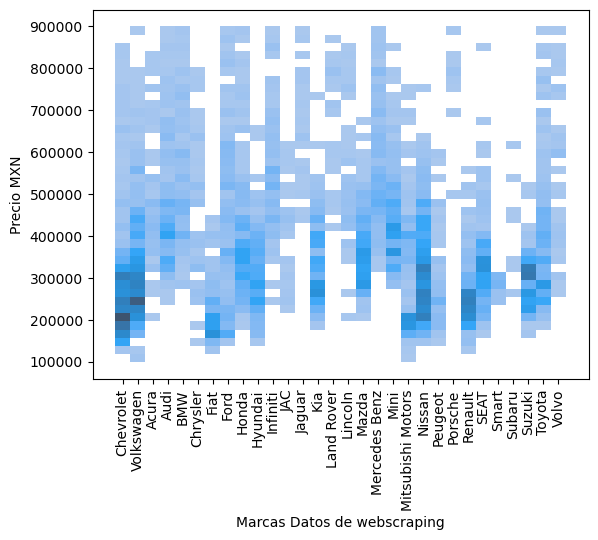

In [33]:
sn.histplot(data= ventas_scraping, x= 'Marcas', y= 'Precio MXN')
plt.xticks(rotation=90)
plt.xlabel('Marcas Datos de webscraping')
plt.ylabel('Precio MXN')

[Text(0.5, 0, 'Las 6 marcas mas populares'),
 Text(0, 0.5, 'Precio en moneda nacional (MXN)')]

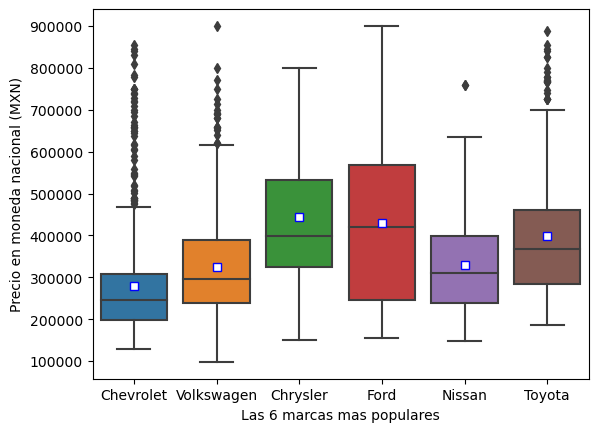

In [34]:
# Primero selecciono 
df_modelos = ventas_scraping[ventas_scraping['Marcas'].isin(['Chevrolet', 'Ford', 'Chrysler', 'Nissan', 'Toyota', 'Volkswagen'])]

# Hago el boxplot con 2 variables
sn.boxplot(x = df_modelos['Marcas'],
            y = df_modelos['Precio MXN'], showmeans=True,
          meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
            xlabel = 'Las 6 marcas mas populares',
            ylabel = 'Precio en moneda nacional (MXN)')

Text(0, 0.5, 'Precio MXN')

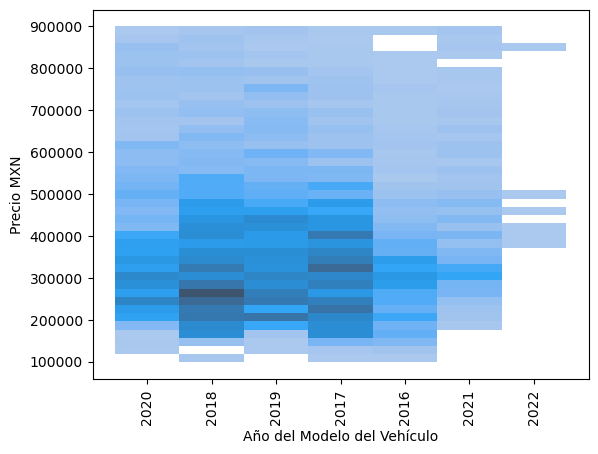

In [35]:
sn.histplot(data= ventas_scraping, x= 'Año del Modelo', y= 'Precio MXN')
plt.xticks(rotation=90)
plt.xlabel('Año del Modelo del Vehículo')
plt.ylabel('Precio MXN')

[Text(0.5, 0, 'Años del Modelo del Vehiculo'),
 Text(0, 0.5, 'Precio en moneda nacional (MXN)')]

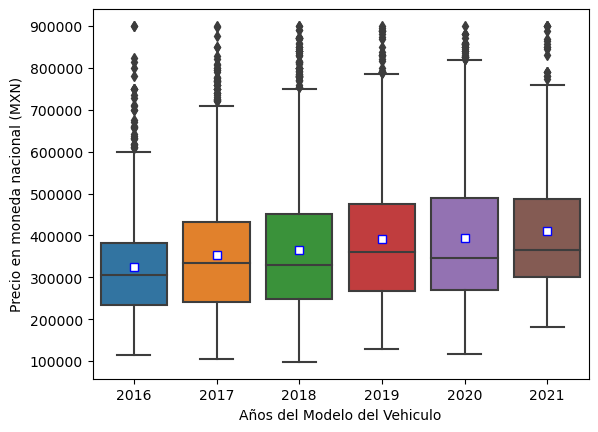

In [42]:
# Hago el boxplot con 2 variables
sn.boxplot(x = ventas_scraping['Año del Modelo'],
            y = ventas_scraping['Precio MXN'], 
          order = ['2016', '2017', '2018', '2019', '2020', '2021'], showmeans=True,
          meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
            xlabel = 'Años del Modelo del Vehiculo',
            ylabel = 'Precio en moneda nacional (MXN)')

Text(0, 0.5, 'Precio MXN')

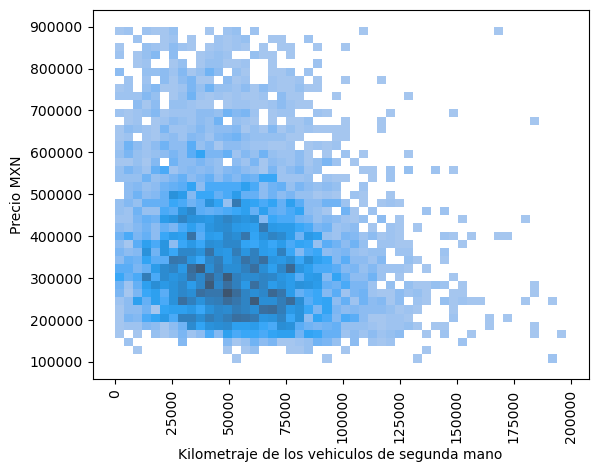

In [37]:
sn.histplot(data= ventas_scraping, x= 'Kilometraje de los vehiculos de segunda mano', y= 'Precio MXN')
plt.xticks(rotation=90)
plt.xlabel('Kilometraje de los vehiculos de segunda mano')
plt.ylabel('Precio MXN')

[Text(0.5, 0, 'Las 6 marcas mas populares'),
 Text(0, 0.5, 'Kilometraje de los vehiculos seminuevos')]

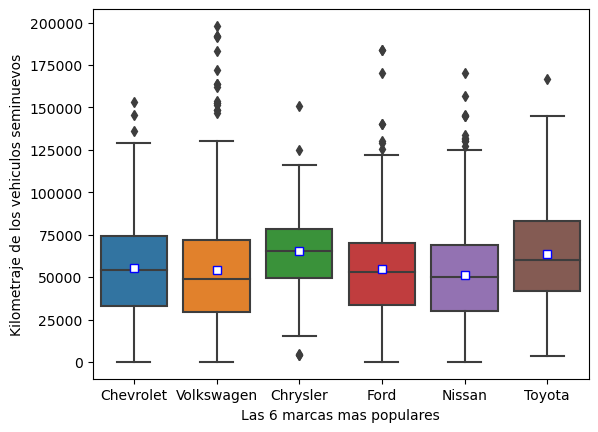

In [40]:
# Hago el boxplot con 2 variables
sn.boxplot(x = df_modelos['Marcas'],
            y = df_modelos['Kilometraje de los vehiculos de segunda mano'], showmeans=True,
          meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
            xlabel = 'Las 6 marcas mas populares',
            ylabel = 'Kilometraje de los vehiculos seminuevos')

[Text(0.5, 0, 'Las 6 marcas mas populares'),
 Text(0, 0.5, 'Diferencia entre año de Modelo y Año actual (2022)')]

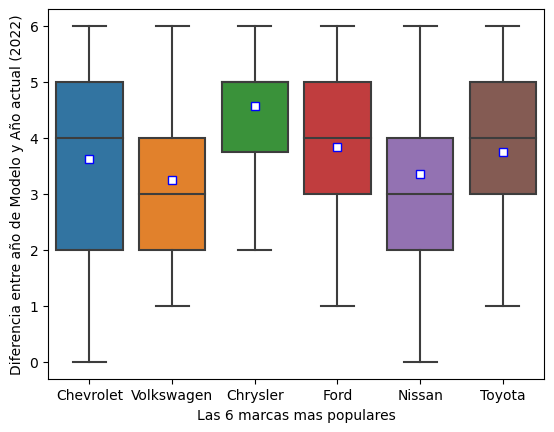

In [39]:
# Hago el boxplot con 2 variables
sn.boxplot(x = df_modelos['Marcas'],
            y = df_modelos['Diferencia entre año de Modelo y Año actual (2022)'], showmeans=True,
          meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
            xlabel = 'Las 6 marcas mas populares',
            ylabel = 'Diferencia entre año de Modelo y Año actual (2022)')

# Seleccion de 2 modelos de las 3 marcas mas populares de webscraping

In [45]:
# Primero selecciono Chevrolet
chv_mdl = ventas_scraping[ventas_scraping['Marcas'].isin(['Chevrolet'])]
chv_mdl.head()

,Marcas,Modelos,Año del Modelo,Diferencia entre año de Modelo y Año actual (2022),Kilometraje de los vehiculos de segunda mano,Ciudad de Venta,Precio MXN,hash
0,Chevrolet,Aveo,2020,2,19440,Tlalpan,212700,Chevrolet_Aveo_2020_19440_Tlalpan_212700
1,Chevrolet,Aveo,2018,4,50000,San Pedro Garza Garcia,165000,Chevrolet_Aveo_2018_50000_San Pedro Garza Garc...
2,Chevrolet,Aveo,2018,4,30000,Tlalnepantla,197600,Chevrolet_Aveo_2018_30000_Tlalnepantla_197600
3,Chevrolet,Aveo,2019,3,15697,Tlalnepantla,200800,Chevrolet_Aveo_2019_15697_Tlalnepantla_200800
4,Chevrolet,Aveo,2018,4,44769,Texcoco,180000,Chevrolet_Aveo_2018_44769_Texcoco_180000


Text(0, 0.5, 'Conteo total de publicaciónes')

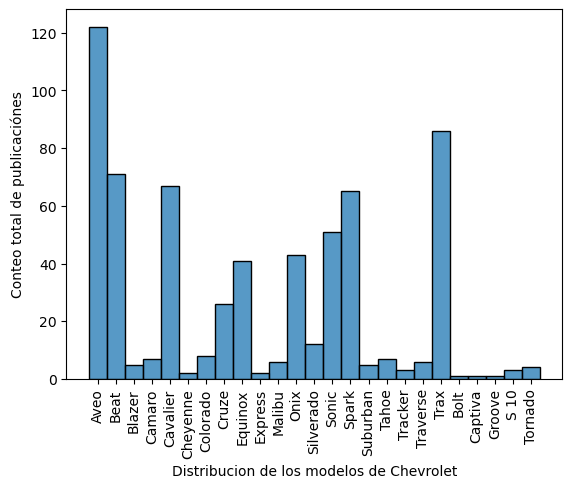

In [46]:
# Ploteo los modelos de Chevrolet

sn.histplot(data= chv_mdl['Modelos'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Chevrolet')
plt.ylabel('Conteo total de publicaciónes')

In [47]:
# Primero selecciono Chevrolet
nsn_mdl = ventas_scraping[ventas_scraping['Marcas'].isin(['Nissan'])]
nsn_mdl.head()

,Marcas,Modelos,Año del Modelo,Diferencia entre año de Modelo y Año actual (2022),Kilometraje de los vehiculos de segunda mano,Ciudad de Venta,Precio MXN,hash
1836,Nissan,Altima,2017,5,36000,Benito Juarez,349000,Nissan_Altima_2017_36000_Benito Juarez_349000
1837,Nissan,Altima,2017,5,60841,Ecatepec,339000,Nissan_Altima_2017_60841_Ecatepec_339000
1838,Nissan,Altima,2017,5,73132,Ecatepec,329900,Nissan_Altima_2017_73132_Ecatepec_329900
1839,Nissan,Altima,2016,6,77500,Guadalajara,213000,Nissan_Altima_2016_77500_Guadalajara_213000
1840,Nissan,Altima,2019,3,15399,Miguel Hidalgo,425000,Nissan_Altima_2019_15399_Miguel Hidalgo_425000


Text(0, 0.5, 'Conteo total de publicaciónes')

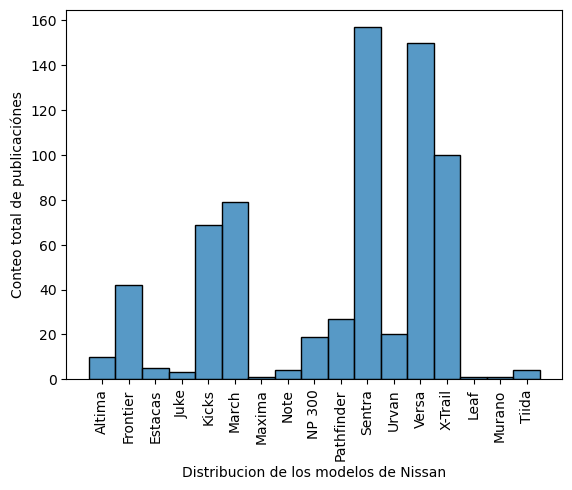

In [48]:
# Ploteo los modelos de Nissan

sn.histplot(data= nsn_mdl['Modelos'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Nissan')
plt.ylabel('Conteo total de publicaciónes')

In [49]:
# Primero selecciono Chevrolet
vlk_mdl = ventas_scraping[ventas_scraping['Marcas'].isin(['Volkswagen'])]
vlk_mdl.head()

,Marcas,Modelos,Año del Modelo,Diferencia entre año de Modelo y Año actual (2022),Kilometraje de los vehiculos de segunda mano,Ciudad de Venta,Precio MXN,hash
6,Volkswagen,Amarok,2018,4,58572,Cuauhtemoc,619999,Volkswagen_Amarok_2018_58572_Cuauhtemoc_619999
112,Volkswagen,Cross Sport,2017,5,36000,Cuauhtemoc,354999,Volkswagen_Cross Sport_2017_36000_Cuauhtemoc_3...
2624,Volkswagen,Gol,2019,3,24602,Coyoacan,210000,Volkswagen_Gol_2019_24602_Coyoacan_210000
2703,Volkswagen,Amarok,2019,3,17984,San Pedro Cholula,609000,Volkswagen_Amarok_2019_17984_San Pedro Cholula...
2704,Volkswagen,Amarok,2020,2,26000,Miguel Hidalgo,800000,Volkswagen_Amarok_2020_26000_Miguel Hidalgo_80...


Text(0, 0.5, 'Conteo total de publicaciónes')

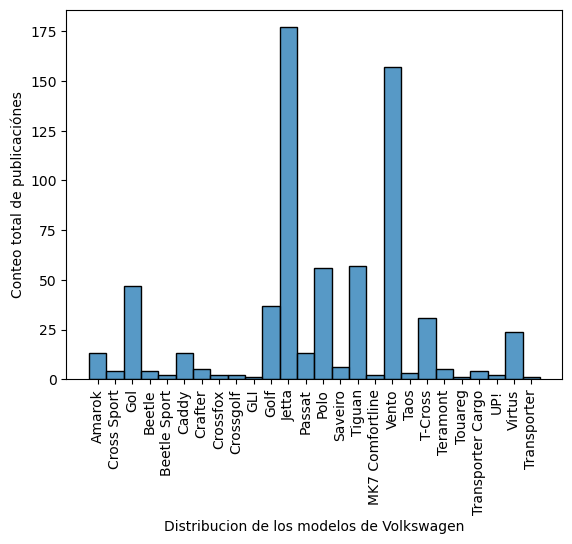

In [50]:
# Ploteo los modelos de Volkswagen

sn.histplot(data= vlk_mdl['Modelos'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Volkswagen')
plt.ylabel('Conteo total de publicaciónes')

# 2 modelos de las 3 marcas mas populares de webscraping

In [51]:
ventas_inegi['MARCA'].unique()

array(['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'BMW', 'Chrysler',
       'Fiat', 'Ford Motor', 'General Motors', 'Honda', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'KIA', 'Land Rover', 'Lincoln',
       'Mazda', 'Mercedes Benz', 'Mini', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Porsche', 'Renault', 'SEAT', 'Smart', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'JAC', 'Lexus',
       'MOTORNATION', 'MG Motor'], dtype=object)

In [52]:
# Primero selecciono Chevrolet
chv_mdl = ventas_inegi[ventas_inegi['MARCA'].isin(['General Motors'])]
chv_mdl.head()

,PROD_EST,COBERTURA,Año que se realizo la Venta,Mes que se realizo la Venta,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID Pais de Origen,Cantidad de Unidades Vendidas
91,Registro Administrativo de la Industria Automo...,Nacional,2016,1,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,66,126
92,Registro Administrativo de la Industria Automo...,Nacional,2016,2,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,66,97
93,Registro Administrativo de la Industria Automo...,Nacional,2016,3,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,66,121
94,Registro Administrativo de la Industria Automo...,Nacional,2016,4,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,66,96
95,Registro Administrativo de la Industria Automo...,Nacional,2016,5,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,66,93


Text(0, 0.5, 'Conteo total de publicaciónes')

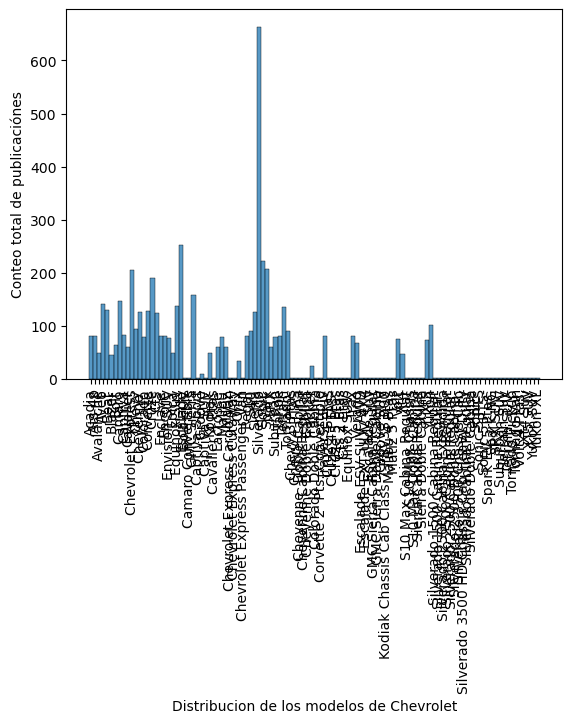

In [53]:
sn.histplot(data= chv_mdl['MODELO'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Chevrolet')
plt.ylabel('Conteo total de publicaciónes')

In [54]:
# Primero selecciono Nissan
nsn_mdl = ventas_inegi[ventas_inegi['MARCA'].isin(['Nissan'])]
nsn_mdl.head()

,PROD_EST,COBERTURA,Año que se realizo la Venta,Mes que se realizo la Venta,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID Pais de Origen,Cantidad de Unidades Vendidas
219,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Nissan,370 Z,Automóviles,Deportivos,IMPORTADO,126,8
220,Registro Administrativo de la Industria Automo...,Nacional,2016,2,Nissan,370 Z,Automóviles,Deportivos,IMPORTADO,126,7
221,Registro Administrativo de la Industria Automo...,Nacional,2016,3,Nissan,370 Z,Automóviles,Deportivos,IMPORTADO,126,10
222,Registro Administrativo de la Industria Automo...,Nacional,2016,4,Nissan,370 Z,Automóviles,Deportivos,IMPORTADO,126,10
223,Registro Administrativo de la Industria Automo...,Nacional,2016,5,Nissan,370 Z,Automóviles,Deportivos,IMPORTADO,126,10


Text(0, 0.5, 'Conteo total de publicaciónes')

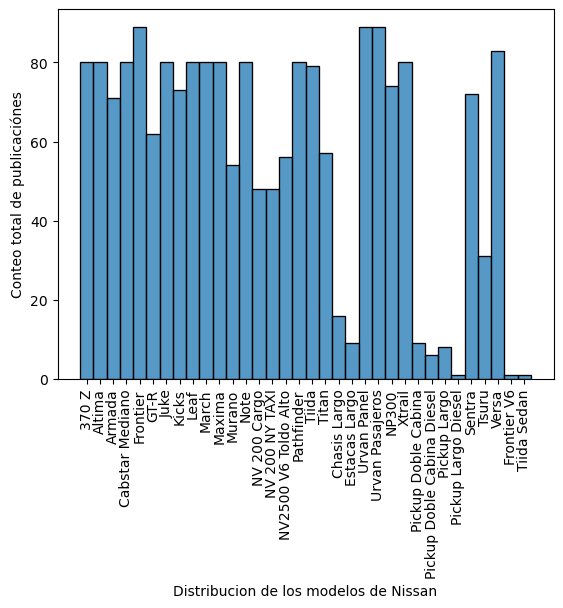

In [55]:
sn.histplot(data= nsn_mdl['MODELO'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Nissan')
plt.ylabel('Conteo total de publicaciónes')

In [56]:
# Primero selecciono Volkswagen
vlk_mdl = ventas_inegi[ventas_inegi['MARCA'].isin(['Volkswagen'])]
vlk_mdl.head()

,PROD_EST,COBERTURA,Año que se realizo la Venta,Mes que se realizo la Venta,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID Pais de Origen,Cantidad de Unidades Vendidas
315,Registro Administrativo de la Industria Automo...,Nacional,2016,1,Volkswagen,Amarok,Camiones ligeros,Pick Ups,IMPORTADO,12,305
316,Registro Administrativo de la Industria Automo...,Nacional,2016,2,Volkswagen,Amarok,Camiones ligeros,Pick Ups,IMPORTADO,12,414
317,Registro Administrativo de la Industria Automo...,Nacional,2016,3,Volkswagen,Amarok,Camiones ligeros,Pick Ups,IMPORTADO,12,141
318,Registro Administrativo de la Industria Automo...,Nacional,2016,4,Volkswagen,Amarok,Camiones ligeros,Pick Ups,IMPORTADO,12,101
319,Registro Administrativo de la Industria Automo...,Nacional,2016,5,Volkswagen,Amarok,Camiones ligeros,Pick Ups,IMPORTADO,12,157


Text(0, 0.5, 'Conteo total de publicaciónes')

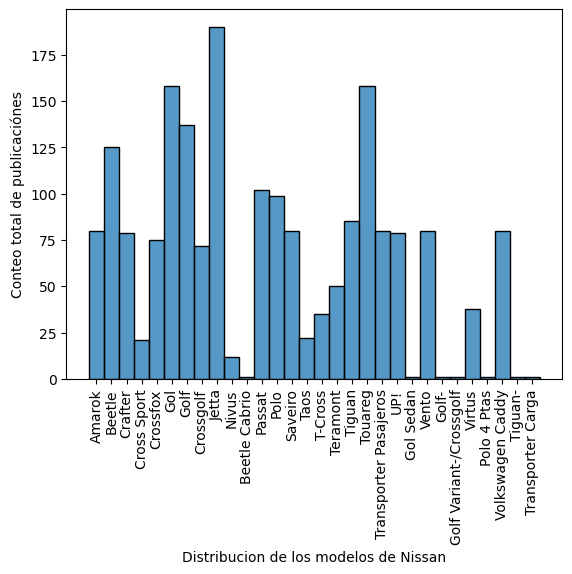

In [57]:
sn.histplot(data= vlk_mdl['MODELO'])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.xlabel('Distribucion de los modelos de Nissan')
plt.ylabel('Conteo total de publicaciónes')